In [1]:
import pandas as pd 
import os
import re
import warnings
warnings.filterwarnings("ignore")
import sys
sys.path.append('../../')
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm
# 设置绘图风格
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['figure.figsize'] = (12, 6)
sns.set_palette("Set2")

file_path = '../../../freqtrade/user_data/data/binance/futures'
time_frame = '1d'

def extract_coin_symbols(directory):
    coin_list = []
    pattern = re.compile(r'(.+?)_USDT-1d-futures\.feather$')

    for filename in os.listdir(directory):
        match = pattern.match(filename)
        if match:
            coin_symbol = (match.group(1)+':USDT').replace('_','/')
            coin_list.append(coin_symbol)
    
    return coin_list


if os.path.exists(file_path) and os.path.isdir(file_path):
    coins = extract_coin_symbols(file_path)
# print(coins)
top50 = [
"BTC/USDT:USDT","ETH/USDT:USDT","XRP/USDT:USDT","BNB/USDT:USDT","SOL/USDT:USDT","DOGE/USDT:USDT","TRX/USDT:USDT","ADA/USDT:USDT","SUI/USDT:USDT","HYPE/USDT:USDT","LINK/USDT:USDT","AVAX/USDT:USDT","XLM/USDT:USDT","TON/USDT:USDT","BCH/USDT:USDT","HBAR/USDT:USDT","LTC/USDT:USDT","DOT/USDT:USDT","XMR/USDT:USDT","UNI/USDT:USDT","AAVE/USDT:USDT","TAO/USDT:USDT","NEAR/USDT:USDT","APT/USDT:USDT","ONDO/USDT:USDT","ICP/USDT:USDT","ETC/USDT:USDT","KAS/USDT:USDT","POL/USDT:USDT","TRUMP/USDT:USDT","VET/USDT:USDT","RENDER/USDT:USDT","ENA/USDT:USDT","FET/USDT:USDT","WLD/USDT:USDT","ARB/USDT:USDT","FIL/USDT:USDT"
]

top100 = [
"BTC/USDT:USDT","ETH/USDT:USDT","XRP/USDT:USDT","BNB/USDT:USDT","SOL/USDT:USDT","DOGE/USDT:USDT","TRX/USDT:USDT","ADA/USDT:USDT","SUI/USDT:USDT","HYPE/USDT:USDT","LINK/USDT:USDT","AVAX/USDT:USDT","XLM/USDT:USDT","TON/USDT:USDT","BCH/USDT:USDT","HBAR/USDT:USDT","LTC/USDT:USDT","DOT/USDT:USDT","XMR/USDT:USDT","UNI/USDT:USDT","AAVE/USDT:USDT","TAO/USDT:USDT","NEAR/USDT:USDT","APT/USDT:USDT","ONDO/USDT:USDT","ICP/USDT:USDT","ETC/USDT:USDT","KAS/USDT:USDT","POL/USDT:USDT","TRUMP/USDT:USDT","VET/USDT:USDT","RENDER/USDT:USDT","ENA/USDT:USDT","FET/USDT:USDT","WLD/USDT:USDT","ARB/USDT:USDT","FIL/USDT:USDT","ATOM/USDT:USDT","ALGO/USDT:USDT","JUP/USDT:USDT","TIA/USDT:USDT","VIRTUAL/USDT:USDT","INJ/USDT:USDT","QNT/USDT:USDT","STX/USDT:USDT","S/USDT:USDT","DEXE/USDT:USDT","OP/USDT:USDT","FARTCOIN/USDT:USDT","IP/USDT:USDT","FORM/USDT:USDT","SEI/USDT:USDT","A/USDT:USDT","SPX/USDT:USDT","IMX/USDT:USDT","WIF/USDT:USDT","GRT/USDT:USDT","CRV/USDT:USDT","LDO/USDT:USDT","ZEC/USDT:USDT","ENS/USDT:USDT","JASMY/USDT:USDT","THETA/USDT:USDT","CAKE/USDT:USDT","GALA/USDT:USDT","WAL/USDT:USDT","SAND/USDT:USDT","IOTA/USDT:USDT","PYTH/USDT:USDT","PENGU/USDT:USDT","BSV/USDT:USDT","PENDLE/USDT:USDT","KAIA/USDT:USDT"
]

top150 = [
"BTC/USDT:USDT","ETH/USDT:USDT","XRP/USDT:USDT","BNB/USDT:USDT","SOL/USDT:USDT","DOGE/USDT:USDT","TRX/USDT:USDT","ADA/USDT:USDT","SUI/USDT:USDT","HYPE/USDT:USDT","LINK/USDT:USDT","AVAX/USDT:USDT","XLM/USDT:USDT","TON/USDT:USDT","BCH/USDT:USDT","HBAR/USDT:USDT","LTC/USDT:USDT","DOT/USDT:USDT","XMR/USDT:USDT","UNI/USDT:USDT","AAVE/USDT:USDT","TAO/USDT:USDT","NEAR/USDT:USDT","APT/USDT:USDT","ONDO/USDT:USDT","ICP/USDT:USDT","ETC/USDT:USDT","KAS/USDT:USDT","POL/USDT:USDT","TRUMP/USDT:USDT","VET/USDT:USDT","RENDER/USDT:USDT","ENA/USDT:USDT","FET/USDT:USDT","WLD/USDT:USDT","ARB/USDT:USDT","FIL/USDT:USDT","ATOM/USDT:USDT","ALGO/USDT:USDT","JUP/USDT:USDT","TIA/USDT:USDT","VIRTUAL/USDT:USDT","INJ/USDT:USDT","QNT/USDT:USDT","STX/USDT:USDT","S/USDT:USDT","DEXE/USDT:USDT","OP/USDT:USDT","FARTCOIN/USDT:USDT","IP/USDT:USDT","FORM/USDT:USDT","SEI/USDT:USDT","A/USDT:USDT","SPX/USDT:USDT","IMX/USDT:USDT","WIF/USDT:USDT","GRT/USDT:USDT","CRV/USDT:USDT","LDO/USDT:USDT","ZEC/USDT:USDT","ENS/USDT:USDT","JASMY/USDT:USDT","THETA/USDT:USDT","CAKE/USDT:USDT","GALA/USDT:USDT","WAL/USDT:USDT","SAND/USDT:USDT","IOTA/USDT:USDT","PYTH/USDT:USDT","PENGU/USDT:USDT","BSV/USDT:USDT","PENDLE/USDT:USDT","KAIA/USDT:USDT","XTZ/USDT:USDT","RUNE/USDT:USDT","FLOW/USDT:USDT","BRETT/USDT:USDT","ZKJ/USDT:USDT","JTO/USDT:USDT","XCN/USDT:USDT","MANA/USDT:USDT","APE/USDT:USDT","KAITO/USDT:USDT","DEEP/USDT:USDT","ATH/USDT:USDT","GRASS/USDT:USDT","EIGEN/USDT:USDT","EGLD/USDT:USDT","DYDX/USDT:USDT","AR/USDT:USDT","AERO/USDT:USDT","STRK/USDT:USDT","KAVA/USDT:USDT","NEO/USDT:USDT","AXS/USDT:USDT","RSR/USDT:USDT","SUPER/USDT:USDT","LPT/USDT:USDT","ETHFI/USDT:USDT","W/USDT:USDT","CFX/USDT:USDT","SYRUP/USDT:USDT","CHZ/USDT:USDT","MOVE/USDT:USDT","POPCAT/USDT:USDT","MORPHO/USDT:USDT","COMP/USDT:USDT","SAFE/USDT:USDT","SUN/USDT:USDT"
]

top200 = [
"BTC/USDT:USDT","ETH/USDT:USDT","XRP/USDT:USDT","BNB/USDT:USDT","SOL/USDT:USDT","DOGE/USDT:USDT","TRX/USDT:USDT","ADA/USDT:USDT","SUI/USDT:USDT","HYPE/USDT:USDT","LINK/USDT:USDT","AVAX/USDT:USDT","XLM/USDT:USDT","TON/USDT:USDT","BCH/USDT:USDT","HBAR/USDT:USDT","LTC/USDT:USDT","DOT/USDT:USDT","XMR/USDT:USDT","UNI/USDT:USDT","AAVE/USDT:USDT","TAO/USDT:USDT","NEAR/USDT:USDT","APT/USDT:USDT","ONDO/USDT:USDT","ICP/USDT:USDT","ETC/USDT:USDT","KAS/USDT:USDT","POL/USDT:USDT","TRUMP/USDT:USDT","VET/USDT:USDT","RENDER/USDT:USDT","ENA/USDT:USDT","FET/USDT:USDT","WLD/USDT:USDT","ARB/USDT:USDT","FIL/USDT:USDT","ATOM/USDT:USDT","ALGO/USDT:USDT","JUP/USDT:USDT","TIA/USDT:USDT","VIRTUAL/USDT:USDT","INJ/USDT:USDT","QNT/USDT:USDT","STX/USDT:USDT","S/USDT:USDT","DEXE/USDT:USDT","OP/USDT:USDT","FARTCOIN/USDT:USDT","IP/USDT:USDT","FORM/USDT:USDT","SEI/USDT:USDT","A/USDT:USDT","SPX/USDT:USDT","IMX/USDT:USDT","WIF/USDT:USDT","GRT/USDT:USDT","CRV/USDT:USDT","LDO/USDT:USDT","ZEC/USDT:USDT","ENS/USDT:USDT","JASMY/USDT:USDT","THETA/USDT:USDT","CAKE/USDT:USDT","GALA/USDT:USDT","WAL/USDT:USDT","SAND/USDT:USDT","IOTA/USDT:USDT","PYTH/USDT:USDT","PENGU/USDT:USDT","BSV/USDT:USDT","PENDLE/USDT:USDT","KAIA/USDT:USDT","XTZ/USDT:USDT","RUNE/USDT:USDT","FLOW/USDT:USDT","BRETT/USDT:USDT","ZKJ/USDT:USDT","JTO/USDT:USDT","XCN/USDT:USDT","MANA/USDT:USDT","APE/USDT:USDT","KAITO/USDT:USDT","DEEP/USDT:USDT","ATH/USDT:USDT","GRASS/USDT:USDT","EIGEN/USDT:USDT","EGLD/USDT:USDT","DYDX/USDT:USDT","AR/USDT:USDT","AERO/USDT:USDT","STRK/USDT:USDT","KAVA/USDT:USDT","NEO/USDT:USDT","AXS/USDT:USDT","RSR/USDT:USDT","SUPER/USDT:USDT","LPT/USDT:USDT","ETHFI/USDT:USDT","W/USDT:USDT","CFX/USDT:USDT","SYRUP/USDT:USDT","CHZ/USDT:USDT","MOVE/USDT:USDT","POPCAT/USDT:USDT","MORPHO/USDT:USDT","COMP/USDT:USDT","SAFE/USDT:USDT","SUN/USDT:USDT","TWT/USDT:USDT","JST/USDT:USDT","AKT/USDT:USDT","OM/USDT:USDT","AXL/USDT:USDT","TURBO/USDT:USDT","BERA/USDT:USDT","1INCH/USDT:USDT","MEW/USDT:USDT","MINA/USDT:USDT","KSM/USDT:USDT","AI16Z/USDT:USDT","DASH/USDT:USDT","PNUT/USDT:USDT","ZRO/USDT:USDT","NXPC/USDT:USDT","SFP/USDT:USDT","NOT/USDT:USDT","SNX/USDT:USDT","GLM/USDT:USDT","ROSE/USDT:USDT","ZIL/USDT:USDT","MOCA/USDT:USDT","MASK/USDT:USDT","BLUR/USDT:USDT","QTUM/USDT:USDT","CKB/USDT:USDT","MOODENG/USDT:USDT","ASTR/USDT:USDT","ZK/USDT:USDT","ZRX/USDT:USDT","GAS/USDT:USDT","ORDI/USDT:USDT","BAT/USDT:USDT","VANA/USDT:USDT","ACH/USDT:USDT"
]

import random
random200 = random.sample(coins, 200)

target_coins = top200


def extract_coin_data(directory):
    coins = []
    symbols = []
    pattern = re.compile(r'(.+?)_USDT-1d-futures\.feather$')

    for filename in os.listdir(directory):
        match = pattern.match(filename)
        if match:
            coin_symbol = (match.group(1)+':USDT').replace('_','/')
            if coin_symbol in target_coins: 
                df = pd.read_feather(f'{directory}/{filename}')
                df = df.reset_index(drop=True)
                df['symbol'] = coin_symbol
                if len(df) > 0 :
                    coins.append(df)
                    symbols.append(coin_symbol)
    
    return coins,symbols

if os.path.exists(file_path) and os.path.isdir(file_path):
    coins,symbols = extract_coin_data(file_path)

data = pd.concat(coins)
data = data[data['date'] > '2024-01-01']
data

,date,open,high,low,close,volume,symbol
1577,2024-01-02 00:00:00+00:00,44230.3000,45950.0000,44200.9000,44979.8000,4.597985e+05,BTC/USDT:USDT
1578,2024-01-03 00:00:00+00:00,44979.7000,45582.3000,40333.0000,42849.5000,5.958552e+05,BTC/USDT:USDT
1579,2024-01-04 00:00:00+00:00,42849.5000,44840.8000,42625.0000,44143.8000,3.339231e+05,BTC/USDT:USDT
1580,2024-01-05 00:00:00+00:00,44143.8000,44500.0000,42300.0000,44145.4000,3.749678e+05,BTC/USDT:USDT
1581,2024-01-06 00:00:00+00:00,44145.3000,44214.6000,43391.3000,43956.7000,1.385428e+05,BTC/USDT:USDT
...,...,...,...,...,...,...,...
550,2025-05-29 00:00:00+00:00,0.7896,0.8109,0.7472,0.7513,7.085587e+06,SUPER/USDT:USDT
551,2025-05-30 00:00:00+00:00,0.7512,0.7604,0.6440,0.6521,1.321210e+07,SUPER/USDT:USDT
552,2025-05-31 00:00:00+00:00,0.6521,0.6836,0.6303,0.6762,8.211171e+06,SUPER/USDT:USDT
553,2025-06-01 00:00:00+00:00,0.6767,0.6946,0.6447,0.6894,7.338527e+06,SUPER/USDT:USDT


In [2]:
# """数据预处理：计算收益率和特征"""
print("Preprocessing data...")
# 确保日期格式正确
data['date'] = pd.to_datetime(data['date'])
data.sort_values(['symbol', 'date'], inplace=True)
# 计算日收益率
data['return'] = data.groupby('symbol')['close'].pct_change()
data['amount'] = data['close']*data['volume']


### 单因子计算

# 计算波动率
data['volatility'] = data.groupby('symbol')['return'].transform(lambda x: x.rolling(window=10, min_periods=5).std())

# 计算动量
data['momentum'] = data.groupby('symbol')['return'].transform(lambda x: x.rolling(window=10, min_periods=5).apply(lambda y: (1+y).prod()-1))

# 计算成交额
data['amount'] = data.groupby('symbol')['amount'].transform(lambda x: x.rolling(window=10, min_periods=5).mean())

# 计算price
data['price'] = data.groupby('symbol')['close'].transform(lambda x: x.rolling(window=10, min_periods=5).mean())


# 计算市场收益率 (所有币种等权重平均)
market_return = data.groupby('date')['return'].mean().reset_index()
market_return.columns = ['date', 'market_return']
data = pd.merge(data, market_return, on='date')
data = data.dropna()
data

Preprocessing data...


,date,open,high,low,close,volume,symbol,return,amount,volatility,momentum,price,market_return
5,2024-01-07 00:00:00+00:00,0.4652,0.5172,0.4130,0.4193,253631651.0,1INCH/USDT:USDT,-0.098667,9.346268e+07,0.083855,-0.114280,0.453833,-0.046643
6,2024-01-08 00:00:00+00:00,0.4193,0.4442,0.3797,0.4442,174851772.0,1INCH/USDT:USDT,0.059385,9.120647e+07,0.081888,-0.061681,0.452457,0.065127
7,2024-01-09 00:00:00+00:00,0.4442,0.4550,0.3995,0.4139,141090716.0,1INCH/USDT:USDT,-0.068213,8.710534e+07,0.078173,-0.125687,0.447638,-0.038151
8,2024-01-10 00:00:00+00:00,0.4139,0.4607,0.4069,0.4579,116809972.0,1INCH/USDT:USDT,0.106306,8.337000e+07,0.084371,-0.032742,0.448778,0.089506
9,2024-01-11 00:00:00+00:00,0.4580,0.5269,0.4504,0.5151,185446703.0,1INCH/USDT:USDT,0.124918,8.458536e+07,0.089392,0.088086,0.455410,0.037148
...,...,...,...,...,...,...,...,...,...,...,...,...,...
59125,2025-05-29 00:00:00+00:00,0.2593,0.2661,0.2488,0.2510,38536434.2,ZRX/USDT:USDT,-0.032009,9.273071e+06,0.037586,-0.071746,0.266120,-0.032983
59126,2025-05-30 00:00:00+00:00,0.2509,0.2526,0.2284,0.2306,61677546.8,ZRX/USDT:USDT,-0.081275,9.771202e+06,0.043532,-0.157164,0.261820,-0.094904
59127,2025-05-31 00:00:00+00:00,0.2306,0.2403,0.2236,0.2369,49389719.6,ZRX/USDT:USDT,0.027320,1.009414e+07,0.044186,-0.151808,0.257580,0.015399
59128,2025-06-01 00:00:00+00:00,0.2368,0.2393,0.2286,0.2379,42394656.3,ZRX/USDT:USDT,0.004221,1.030181e+07,0.040060,-0.183036,0.252250,0.019065


In [3]:
print("Calculating factors return...")

# 市场因子 (Market Factor)
market_factor = data.groupby('date')['return'].mean().reset_index()
market_factor.columns = ['date', 'MKT']
        
# 规模因子 (Size Factor)
# 每天根据规模(交易量)将币种分成大小两组，计算小规模组和大规模组的平均收益率之差
size_factor = []
for date, group in tqdm(data.groupby('date'), desc="Calculating size factor"):
    if len(group) < 10:  # 至少需要10个币种才能计算
        continue
    group = group.sort_values('amount')
    winner = group.iloc[-len(group)//3:]  # 大size
    loser = group.iloc[:len(group)//3]    # 小size
    bms = winner['return'].mean() - loser['return'].mean()    
    size_factor.append({'date': date, 'BMS': bms})
size_factor = pd.DataFrame(size_factor)
        
# 动量因子 (Momentum Factor)
mom_factor = []
for date, group in tqdm(data.groupby('date'), desc="Calculating momentum factor"):
    if len(group) < 10:
        continue
    group = group.sort_values('momentum')
    winner = group.iloc[-len(group)//3:]  # 大mom
    loser = group.iloc[:len(group)//3]    # 小mom
    mom = winner['return'].mean() - loser['return'].mean()
    mom_factor.append({'date': date, 'MOM': mom})
mom_factor = pd.DataFrame(mom_factor)

# 波动率因子 (Volatility Factor)
vol_factor = []
for date, group in tqdm(data.groupby('date'), desc="Calculating volatility factor"):
    if len(group) < 10:
        continue
    group = group.sort_values('volatility')
    low_vol = group.iloc[:len(group)//3]   # 低波动率组
    high_vol = group.iloc[-len(group)//3:]  # 高波动率组
    vol = high_vol['return'].mean() - low_vol['return'].mean()
    vol_factor.append({'date': date, 'VOL': vol})
vol_factor = pd.DataFrame(vol_factor)

# 价格因子 (Price Factor)
price_factor = []
for date, group in tqdm(data.groupby('date'), desc="Calculating price factor"):
    if len(group) < 10:
        continue
    group = group.sort_values('price')
    low_price = group.iloc[:len(group)//3]   # 低价格
    high_price = group.iloc[-len(group)//3:]  # 高价格
    price = low_price['return'].mean() - high_price['return'].mean()
    price_factor.append({'date': date, 'PRI': price})
price_factor = pd.DataFrame(price_factor)
  

Calculating factors return...


Calculating price factor: 100%|██████████| 513/513 [00:00<00:00, 2190.70it/s]


In [4]:
# 合并所有因子
factors = market_factor.merge(size_factor, on='date', how='left')
factors = factors.merge(mom_factor, on='date', how='left')
factors = factors.merge(vol_factor, on='date', how='left')
factors = factors.merge(price_factor, on='date', how='left')
factors['const'] = 1


# 因子收益率累计
factors['MKT_Cumulative'] = (1 + factors['MKT']).cumprod() - 1
factors['BMS_Cumulative'] = (1 + factors['BMS']).cumprod() - 1
factors['MOM_Cumulative'] = (1 + factors['MOM']).cumprod() - 1
factors['VOL_Cumulative'] = (1 + factors['VOL']).cumprod() - 1
factors['PRI_Cumulative'] = (1 + factors['PRI']).cumprod() - 1



# factors['MKT_Cumulative'] = factors['MKT'].cumsum()
# factors['SMB_Cumulative'] = factors['SMB'].cumsum()
# factors['MOM_Cumulative'] = factors['MOM'].cumsum()
# factors['VOL_Cumulative'] = factors['VOL'].cumsum()


factors.set_index('date', inplace=True)
factors.dropna(inplace=True)
        
# # 标准化因子
# scaler = StandardScaler()
# factors[['MKT', 'SMB', 'MOM', 'VOL']] = scaler.fit_transform(factors[['MKT', 'SMB', 'MOM', 'VOL']])
        
factors

,MKT,BMS,MOM,VOL,PRI,const,MKT_Cumulative,BMS_Cumulative,MOM_Cumulative,VOL_Cumulative,PRI_Cumulative
date,,,,,,,,,,,
2024-01-07 00:00:00+00:00,-0.046643,0.015036,0.023733,-0.010963,-0.005586,1,-0.046643,0.015036,0.023733,-0.010963,-0.005586
2024-01-08 00:00:00+00:00,0.065127,0.027232,0.023627,0.044877,-0.013484,1,0.015447,0.042677,0.047920,0.033422,-0.018995
2024-01-09 00:00:00+00:00,-0.038151,0.013610,0.043514,-0.012041,-0.013622,1,-0.023293,0.056868,0.093519,0.020978,-0.032358
2024-01-10 00:00:00+00:00,0.089506,0.002304,0.020410,0.057207,-0.009412,1,0.064128,0.059303,0.115838,0.079385,-0.041466
2024-01-11 00:00:00+00:00,0.037148,0.000138,0.027533,0.031321,0.001469,1,0.103658,0.059450,0.146560,0.113192,-0.040057
...,...,...,...,...,...,...,...,...,...,...,...
2025-05-29 00:00:00+00:00,-0.032983,-0.011823,0.022706,-0.016609,-0.013812,1,0.117717,2.425729,90084.270751,32.612021,0.671628
2025-05-30 00:00:00+00:00,-0.094904,0.009673,0.074238,-0.054335,-0.044046,1,0.011641,2.458866,96772.000174,30.785697,0.597999
2025-05-31 00:00:00+00:00,0.015399,-0.005117,-0.005112,0.020719,-0.004977,1,0.027219,2.441167,96277.308201,31.444271,0.590046


Performing single factor tests...


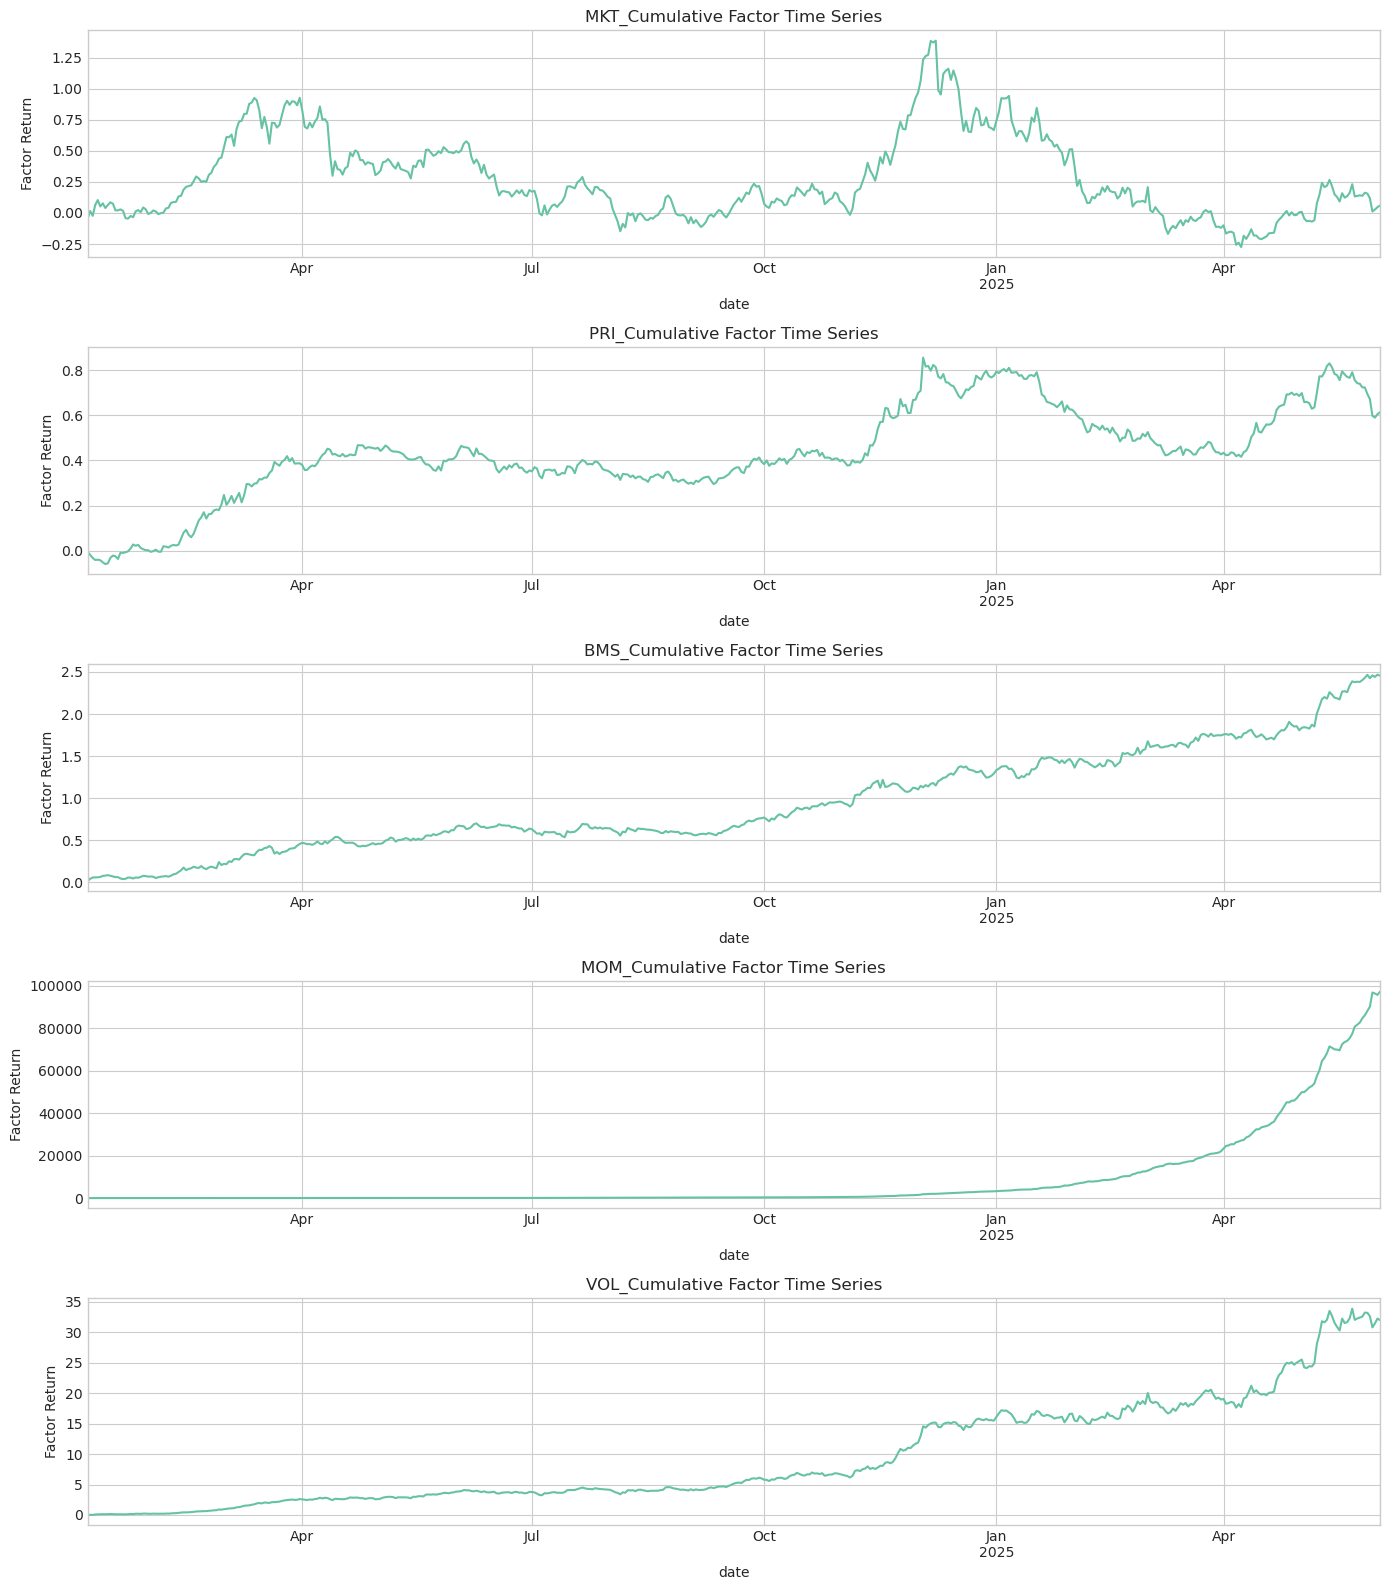

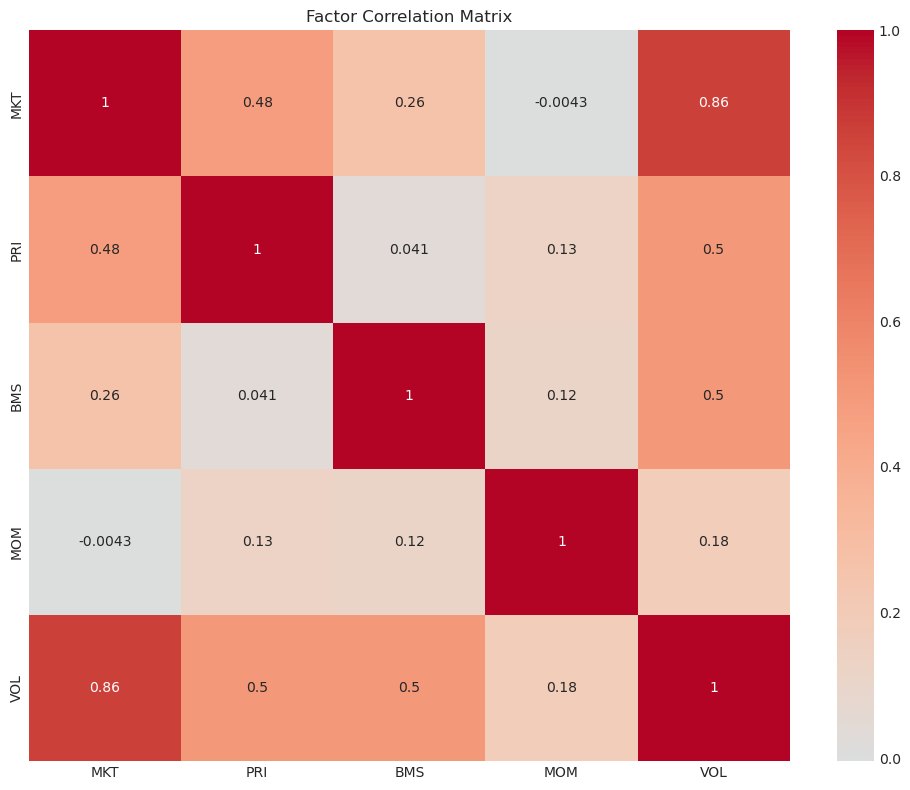

In [5]:
print("Performing single factor tests...")    
# 计算每个因子的描述性统计
factor_stats = factors[['MKT', 'PRI', 'BMS', 'MOM', 'VOL']].describe().T
factor_stats['t-stat'] = factor_stats['mean'] / (factor_stats['std'] / np.sqrt(factor_stats['count']))
factor_stats

# 绘制因子时间序列
fig, axes = plt.subplots(5, 1, figsize=(14, 16))
for i, factor in enumerate(['MKT_Cumulative', 'PRI_Cumulative', 'BMS_Cumulative', 'MOM_Cumulative', 'VOL_Cumulative']):
    factors[factor].plot(ax=axes[i], title=f'{factor} Factor Time Series')
    axes[i].set_ylabel('Factor Return')
plt.tight_layout()
plt.savefig('factor_time_series.png', dpi=300)

# # 绘制因子相关性热力图
plt.figure(figsize=(10, 8))
sns.heatmap(factors[['MKT', 'PRI', 'BMS', 'MOM', 'VOL']].corr(), 
            annot=True, cmap='coolwarm', center=0)
plt.title('Factor Correlation Matrix')
plt.tight_layout()
plt.savefig('factor_correlation.png', dpi=300)

In [10]:
print("Building factor portfolios...")
n_portfolios = 5

data = data.copy()
data = data[data['date'].isin(factors.index)]

portfolio_dfs = []

for factor in ['price', 'amount', 'momentum', 'volatility']:
    portfolio_returns = []
    
    for date, group in tqdm(data.groupby('date'), desc=f"Processing {factor} portfolios"):
        if len(group) < n_portfolios * 3:  # 确保有足够样本
            continue
        # 按因子值分组
        group = group.sort_values(factor)
        group['portfolio'] = pd.qcut(group[factor], n_portfolios, labels=False)
        
        # 计算每个组合的等权重收益率
        port_ret = group.groupby('portfolio')['return'].mean().reset_index()
        port_ret['date'] = date
        portfolio_returns.append(port_ret)
    
    portfolio_returns = pd.concat(portfolio_returns)
    portfolio_returns['factor'] = factor
    portfolio_dfs.append(portfolio_returns)

portfolio_returns = pd.concat(portfolio_dfs)

# 计算投资组合表现统计
portfolio_stats = []
for factor in ['price','amount', 'momentum', 'volatility']:
    for portfolio in range(n_portfolios):
        port_ret = portfolio_returns[
            (portfolio_returns['factor'] == factor) & 
            (portfolio_returns['portfolio'] == portfolio)]['return']
        
        stats = {
            'factor': factor,
            'portfolio': portfolio,
            'mean_return': port_ret.mean(),
            'std_dev': port_ret.std(),
            'sharpe': port_ret.mean() / port_ret.std() * np.sqrt(252),
            'skewness': port_ret.skew(),
            'kurtosis': port_ret.kurtosis(),
            'min': port_ret.min(),
            'max': port_ret.max()
        }
        portfolio_stats.append(stats)

portfolio_stats = pd.DataFrame(portfolio_stats)
portfolio_stats

Building factor portfolios...


Processing volatility portfolios: 100%|██████████| 513/513 [00:01<00:00, 413.46it/s]


,factor,portfolio,mean_return,std_dev,sharpe,skewness,kurtosis,min,max
0,price,0,0.001701,0.046603,0.579416,-0.105105,1.631275,-0.182183,0.213332
1,price,1,0.001187,0.044885,0.419688,-0.153103,1.007912,-0.172967,0.135553
2,price,2,0.000848,0.046839,0.287466,-0.059548,1.172520,-0.167551,0.167264
3,price,3,0.000935,0.041995,0.353618,-0.178652,1.171797,-0.159407,0.135987
4,price,4,0.000467,0.037870,0.195876,-0.199763,1.441560,-0.152927,0.125157
5,amount,0,-0.000519,0.039124,-0.210720,-0.358285,1.451319,-0.168655,0.117438
6,amount,1,0.000038,0.043104,0.013908,-0.311507,1.112581,-0.185149,0.130478
7,amount,2,0.000902,0.045847,0.312466,-0.279989,1.213393,-0.170942,0.159446
8,amount,3,0.002450,0.046382,0.838488,0.091899,1.282865,-0.155059,0.188598
9,amount,4,0.002303,0.043915,0.832628,0.033460,1.287993,-0.177137,0.162707


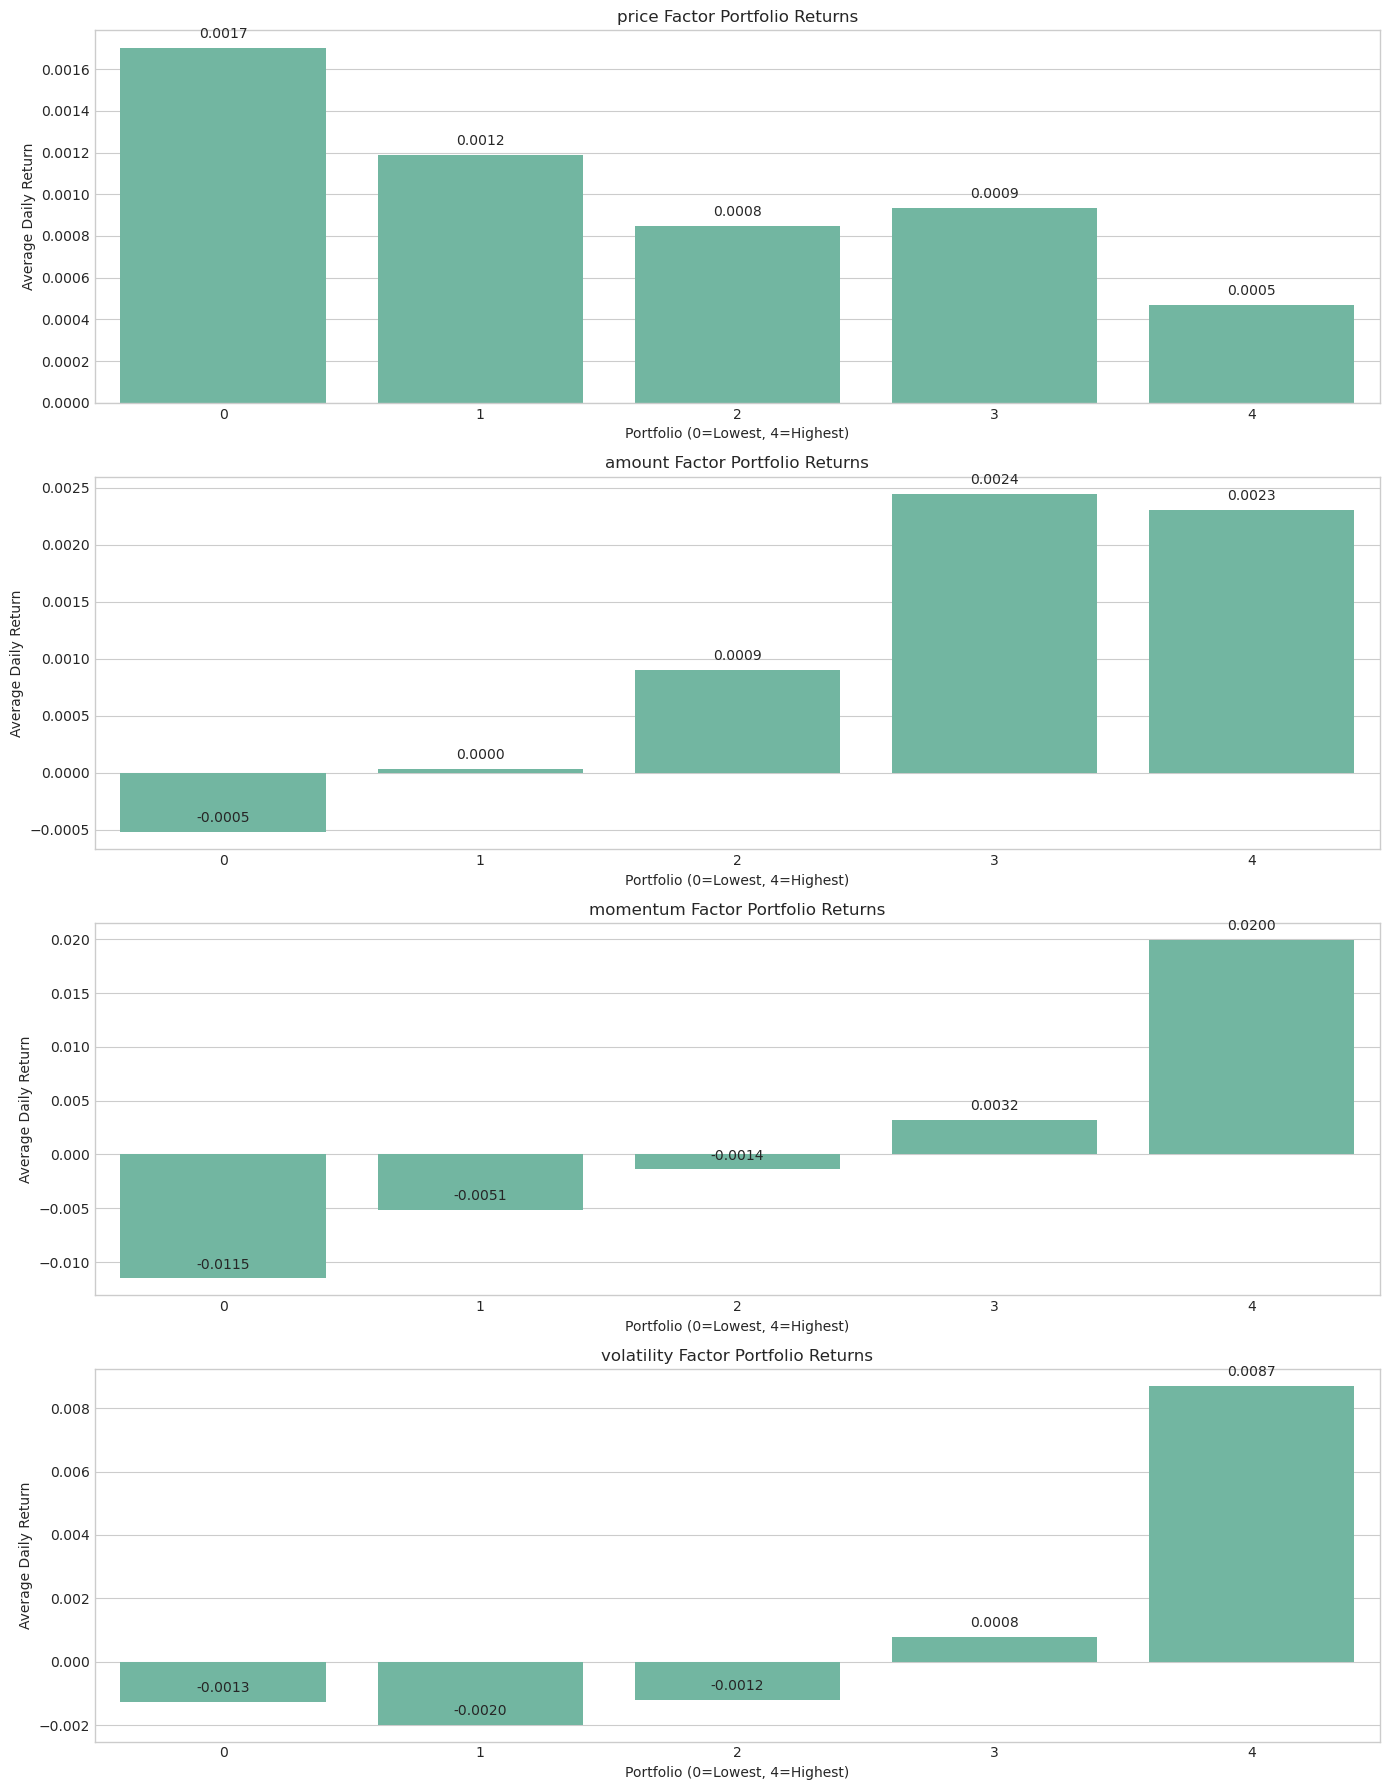

In [11]:
fig, axes = plt.subplots(4, 1, figsize=(14, 18))

for i, factor in enumerate(['price', 'amount', 'momentum', 'volatility']):
    factor_name = factor
    
    # 提取该因子的投资组合数据
    factor_data = portfolio_stats[portfolio_stats['factor'] == factor]
    
    # 绘制平均收益率
    ax = axes[i]
    sns.barplot(x='portfolio', y='mean_return', data=factor_data, ax=ax)
    ax.set_title(f'{factor_name} Factor Portfolio Returns')
    ax.set_xlabel('Portfolio (0=Lowest, 4=Highest)')
    ax.set_ylabel('Average Daily Return')
    
    # 添加数值标签
    for p in ax.patches:
        ax.annotate(f"{p.get_height():.4f}", 
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), 
                    textcoords='offset points')

plt.tight_layout()
plt.savefig('portfolio_performance.png', dpi=300)

In [24]:
print("Running multifactor regression...")

# 准备数据
data = data.copy()
data = data[data['date'].isin(factors.index)]

# 创建结果容器
results = []
        
# 对每个币种运行时间序列回归
for symbol, symbol_data in tqdm(data.groupby('symbol'), desc="Running regressions"):
    if len(symbol_data) < 100:  # 至少需要100个观测值
        continue
    
    # 合并因子数据
    merged = symbol_data.merge(factors.reset_index(), on='date')
    
    # 因变量
    y = merged['return']
    
    # 自变量
    X = merged[['const', 'MKT','PRI','BMS', 'MOM', 'VOL']]
    
    try:
        # 运行OLS回归
        model = sm.OLS(y, X, missing='drop').fit()
        # 存储结果
        res = {
            'symbol': symbol,
            'alpha': model.params['const'],
            'beta_mkt': model.params['MKT'],
            'beta_pri': model.params['PRI'],
            'beta_bms': model.params['BMS'],
            'beta_mom': model.params['MOM'],
            'beta_vol': model.params['VOL'],
            'r_squared': model.rsquared,
            't_alpha': model.tvalues['const'],
            't_mkt': model.tvalues['MKT'],
            't_pri': model.tvalues['PRI'],
            't_bms': model.tvalues['BMS'],
            't_mom': model.tvalues['MOM'],
            't_vol': model.tvalues['VOL'],
            'nobs': model.nobs
        }
        results.append(res)
    except:
        print('error')
        continue

model_results = pd.DataFrame(results)
model_results

Running multifactor regression...


Running regressions: 100%|██████████| 139/139 [00:00<00:00, 299.69it/s]


,symbol,alpha,beta_mkt,beta_pri,beta_bms,beta_mom,beta_vol,r_squared,t_alpha,t_mkt,t_pri,t_bms,t_mom,t_vol,nobs
0,1INCH/USDT:USDT,-0.002435,1.125434,-0.073974,-0.389462,0.149707,-0.193025,0.755528,-1.484486,19.800393,-0.756704,-3.756318,2.528721,-1.954047,513.0
1,AAVE/USDT:USDT,0.003000,1.230308,-0.926840,0.125547,0.073775,-0.284280,0.610062,1.307171,15.471835,-6.776838,0.865521,0.890719,-2.057034,513.0
2,ACH/USDT:USDT,-0.000998,0.895306,0.442548,-0.480193,0.074918,0.220672,0.439290,-0.282023,7.303878,2.099119,-2.147541,0.586776,1.035849,513.0
3,ADA/USDT:USDT,-0.001306,1.382335,-0.096882,0.528542,0.275036,-0.784112,0.558410,-0.511488,15.620073,-0.636516,3.274107,2.983759,-5.098191,513.0
4,AERO/USDT:USDT,-0.011990,1.079987,-0.426555,-0.343385,0.406538,0.341489,0.683207,-2.561277,7.739292,-1.342620,-1.085162,2.427811,1.267987,176.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,ZEC/USDT:USDT,0.003067,0.864270,-0.699356,-0.862299,0.031737,0.147567,0.502741,1.276007,10.379356,-4.883301,-5.677041,0.365924,1.019715,513.0
129,ZIL/USDT:USDT,-0.004331,1.094712,0.196643,-0.444026,0.225397,-0.172025,0.874814,-3.882416,28.322830,2.958075,-6.297798,5.598744,-2.560917,513.0
130,ZK/USDT:USDT,0.001108,1.147770,-0.064723,-0.012518,-0.181725,0.081877,0.806604,0.520946,15.810993,-0.464642,-0.090956,-2.392701,0.647761,346.0
131,ZRO/USDT:USDT,0.002266,0.975143,-0.254243,-0.104050,-0.120666,0.281819,0.522965,0.586944,7.414999,-1.007653,-0.418006,-0.877901,1.228318,343.0


In [ ]:
# 参数名	    经济含义	        统计解释
# alpha	    截距项（超额收益）	当所有因子为0时的预期收益
# beta_mkt	市场风险暴露（如大盘涨跌敏感性）	每单位市场因子变动带来的收益变化
# beta_pri	价值因子暴露（如BP比率）	价值股相对成长股的收益溢价
# beta_bms	账面市值比因子暴露	高B/M股票的特有风险补偿
# beta_mom	动量因子暴露	过去赢家组合的持续收益能力
# beta_vol	波动率因子暴露	高波动股票的额外风险补偿


# 参数名	     判断标准	
# r_squared	 0-1之间，越接近1越好	模型解释力（如0.3表示因子解释30%收益波动）
# t_alpha	 |t|>2为显著	是否存在超额收益（alpha≠0）
# t_mkt	     |t|>2为显著	市场因子是否有效
# t_pri	     |t|>2为显著	价值因子是否有效
# nobs	     样本量越大越可靠	回归自由度（一般需>30）


Analyzing regression results...


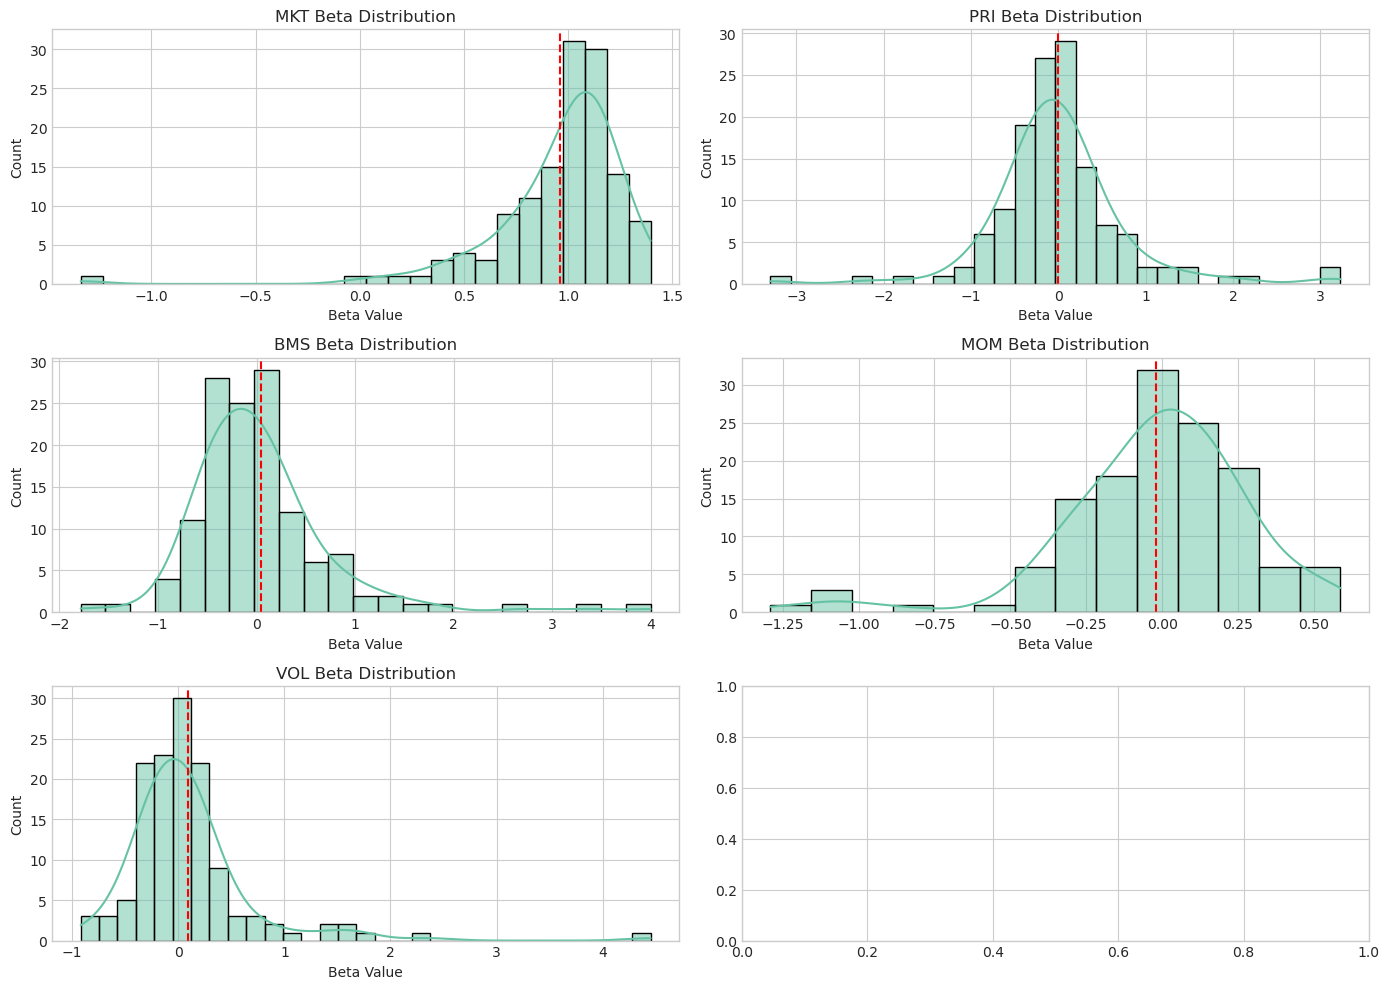

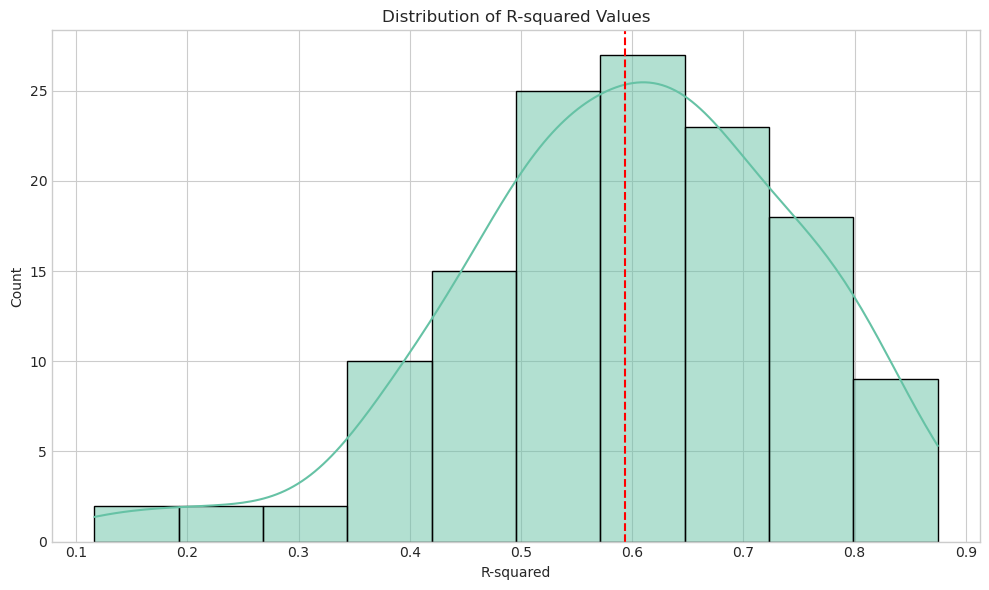

In [30]:
print("Analyzing regression results...")

# 整体平均因子暴露
avg_exposure = model_results[['beta_mkt', 'beta_pri', 'beta_bms', 'beta_mom', 'beta_vol']].mean()
t_stats = model_results[['t_mkt', 't_bms', 't_mom', 't_vol']].mean()

exposure_stats = pd.DataFrame({
    'Average Beta': avg_exposure,
    'Average t-stat': t_stats
})

# 绘制因子暴露分布
fig, axes = plt.subplots(3, 2, figsize=(14, 10))
axes = axes.flatten()

for i, factor in enumerate(['beta_mkt','beta_pri', 'beta_bms', 'beta_mom', 'beta_vol']):
    sns.histplot(model_results[factor], kde=True, ax=axes[i])
    axes[i].set_title(f'{factor[5:].upper()} Beta Distribution')
    axes[i].set_xlabel('Beta Value')
    axes[i].axvline(model_results[factor].mean(), color='r', linestyle='--')

plt.tight_layout()
plt.savefig('beta_distribution.png', dpi=300)

# 绘制R²分布
plt.figure(figsize=(10, 6))
sns.histplot(model_results['r_squared'], kde=True)
plt.axvline(model_results['r_squared'].mean(), color='r', linestyle='--')
plt.title('Distribution of R-squared Values')
plt.xlabel('R-squared')
plt.tight_layout()
plt.savefig('rsquared_distribution.png', dpi=300)

In [ ]:
 print("Building investment portfolio...")

# 规模因子：小规模得分高
model_results['size_score'] = -model_results['beta_smb']
# 动量因子：高动量得分高
model_results['momentum_score'] = model_results['beta_mom']
# 波动率因子：低波动率得分高
model_results['volatility_score'] = -model_results['beta_vol']

# 标准化得分
for score in ['size_score', 'momentum_score', 'volatility_score']:
    model_results[score] = (model_results[score] - 
                                 model_results[score].mean()) / model_results[score].std()

# 综合得分 (等权重)
model_results['composite_score'] = (
    model_results['size_score'] + 
    model_results['momentum_score'] + 
    model_results['volatility_score']
)

# 选择得分最高的币种
top_symbols = model_results.sort_values('composite_score', ascending=False).head(top_n)

# 获取这些币种的收益率数据
portfolio_data = data[data['symbol'].isin(top_symbols['symbol'])]

# 计算等权重组合收益率
portfolio_ret = portfolio_data.groupby('date').apply(
    lambda x: x['return'].mean() if len(x) > 0 else np.nan
).reset_index()
portfolio_ret.columns = ['date', 'portfolio_return']

# 计算累计收益
portfolio_ret['cumulative_return'] = (1 + portfolio_ret['portfolio_return']).cumprod() - 1

date      2025-06-02 00:00:00+00:00
open                       105583.3
high                       105900.0
low                        103600.6
close                      105814.3
                    ...            
high                          0.699
low                          0.6533
close                        0.6934
volume                    7102468.0
symbol              SUPER/USDT:USDT
Length: 973, dtype: object

In [44]:
class CryptoFourFactorModel:
    def __init__(self, data):
        """
        初始化四因子模型
        :param data: DataFrame, 包含以下列: ['date', 'symbol', 'open', 'high', 'low', 'close', 'volume']
        """
        data = data.copy()
        factors = None
        portfolio_returns = None
        portfolio_stats = None
        model_results = None
        _preprocess_data()
    
    def _preprocess_data(self):
        """数据预处理：计算收益率和特征"""
        print("Preprocessing data...")
        # 确保日期格式正确
        data['date'] = pd.to_datetime(data['date'])
        data.sort_values(['symbol', 'date'], inplace=True)
        
        # 计算日收益率
        data['return'] = data.groupby('symbol')['close'].pct_change()
        
        # 计算波动率 (过去30天标准差)
        data['volatility'] = data.groupby('symbol')['return'].transform(
            lambda x: x.rolling(window=30, min_periods=15).std())
        
        # 计算动量 (过去30天累计收益率)
        data['momentum'] = data.groupby('symbol')['return'].transform(
            lambda x: x.rolling(window=30, min_periods=15).apply(lambda y: (1+y).prod()-1))
        
        # 计算规模 (过去30天平均交易量)
        data['volume_avg'] = data.groupby('symbol')['volume'].transform(
            lambda x: x.rolling(window=30, min_periods=15).mean())
        
        # 计算市场收益率 (所有币种等权重平均)
        market_return = data.groupby('date')['return'].mean().reset_index()
        market_return.columns = ['date', 'market_return']
        data = pd.merge(data, market_return, on='date')
        
        # 计算因子值
        _calculate_factors()
    
    def _calculate_factors(self):
        """计算四因子"""
        print("Calculating factors...")
        
        # 市场因子 (Market Factor)
        market_factor = data.groupby('date')['return'].mean().reset_index()
        market_factor.columns = ['date', 'MKT']
        
        # 规模因子 (Size Factor)
        # 每天根据规模(交易量)将币种分成大小两组，计算小规模组和大规模组的平均收益率之差
        size_factor = []
        for date, group in tqdm(data.groupby('date'), desc="Calculating size factor"):
            if len(group) < 10:  # 至少需要10个币种才能计算
                continue
            group = group.sort_values('volume_avg')
            small_size = group.iloc[:len(group)//2]
            big_size = group.iloc[len(group)//2:]
            sbm = small_size['return'].mean() - big_size['return'].mean()
            size_factor.append({'date': date, 'SMB': sbm})
        size_factor = pd.DataFrame(size_factor)
        
        # 动量因子 (Momentum Factor)
        mom_factor = []
        for date, group in tqdm(data.groupby('date'), desc="Calculating momentum factor"):
            if len(group) < 10:
                continue
            group = group.sort_values('momentum')
            winner = group.iloc[-len(group)//3:]  # 前1/3为赢家
            loser = group.iloc[:len(group)//3]    # 后1/3为输家
            mom = winner['return'].mean() - loser['return'].mean()
            mom_factor.append({'date': date, 'MOM': mom})
        mom_factor = pd.DataFrame(mom_factor)
        
        # 波动率因子 (Volatility Factor)
        vol_factor = []
        for date, group in tqdm(data.groupby('date'), desc="Calculating volatility factor"):
            if len(group) < 10:
                continue
            group = group.sort_values('volatility')
            low_vol = group.iloc[:len(group)//3]   # 低波动率组
            high_vol = group.iloc[-len(group)//3:]  # 高波动率组
            vol = low_vol['return'].mean() - high_vol['return'].mean()
            vol_factor.append({'date': date, 'VOL': vol})
        vol_factor = pd.DataFrame(vol_factor)
        
        # 合并所有因子
        factors = market_factor.merge(size_factor, on='date', how='left')
        factors = factors.merge(mom_factor, on='date', how='left')
        factors = factors.merge(vol_factor, on='date', how='left')
        factors.set_index('date', inplace=True)
        factors.dropna(inplace=True)
        
        # 标准化因子
        scaler = StandardScaler()
        factors[['SMB', 'MOM', 'VOL']] = scaler.fit_transform(factors[['SMB', 'MOM', 'VOL']])
        
        # 添加常数项用于回归
        factors['const'] = 1
    
    def single_factor_test(self):
        """单因子检验：分析每个因子的表现"""
        print("Performing single factor tests...")
        
        # 计算每个因子的描述性统计
        factor_stats = factors[['MKT', 'SMB', 'MOM', 'VOL']].describe().T
        factor_stats['t-stat'] = factor_stats['mean'] / (factor_stats['std'] / np.sqrt(factor_stats['count']))
        
        # 绘制因子时间序列
        fig, axes = plt.subplots(4, 1, figsize=(14, 16))
        for i, factor in enumerate(['MKT', 'SMB', 'MOM', 'VOL']):
            factors[factor].plot(ax=axes[i], title=f'{factor} Factor Time Series')
            axes[i].set_ylabel('Factor Return')
        plt.tight_layout()
        plt.savefig('factor_time_series.png', dpi=300)
        
        # 绘制因子相关性热力图
        plt.figure(figsize=(10, 8))
        sns.heatmap(factors[['MKT', 'SMB', 'MOM', 'VOL']].corr(), 
                    annot=True, cmap='coolwarm', center=0)
        plt.title('Factor Correlation Matrix')
        plt.tight_layout()
        plt.savefig('factor_correlation.png', dpi=300)
        
        return factor_stats
    
    def build_factor_portfolios(self, n_portfolios=5):
        """构建因子投资组合"""
        print("Building factor portfolios...")
        
        # 准备数据
        data = data.copy()
        data = data[data['date'].isin(factors.index)]
        
        portfolio_dfs = []
        
        for factor in ['volume_avg', 'momentum', 'volatility']:
            portfolio_returns = []
            
            for date, group in tqdm(data.groupby('date'), desc=f"Processing {factor} portfolios"):
                if len(group) < n_portfolios * 3:  # 确保有足够样本
                    continue
                # 按因子值分组
                group = group.sort_values(factor)
                group['portfolio'] = pd.qcut(group[factor], n_portfolios, labels=False)
                
                # 计算每个组合的等权重收益率
                port_ret = group.groupby('portfolio')['return'].mean().reset_index()
                port_ret['date'] = date
                portfolio_returns.append(port_ret)
            
            portfolio_returns = pd.concat(portfolio_returns)
            portfolio_returns['factor'] = factor
            portfolio_dfs.append(portfolio_returns)
        
        portfolio_returns = pd.concat(portfolio_dfs)
        
        # 计算投资组合表现统计
        portfolio_stats = []
        for factor in ['volume_avg', 'momentum', 'volatility']:
            for portfolio in range(n_portfolios):
                port_ret = portfolio_returns[
                    (portfolio_returns['factor'] == factor) & 
                    (portfolio_returns['portfolio'] == portfolio)]['return']
                
                stats = {
                    'factor': factor,
                    'portfolio': portfolio,
                    'mean_return': port_ret.mean(),
                    'std_dev': port_ret.std(),
                    'sharpe': port_ret.mean() / port_ret.std() * np.sqrt(252),
                    'skewness': port_ret.skew(),
                    'kurtosis': port_ret.kurtosis(),
                    'min': port_ret.min(),
                    'max': port_ret.max()
                }
                portfolio_stats.append(stats)
        
        portfolio_stats = pd.DataFrame(portfolio_stats)
        
        # 绘制投资组合表现
        _plot_portfolio_performance(n_portfolios)
        
        return portfolio_stats
    
    def _plot_portfolio_performance(self, n_portfolios):
        """绘制投资组合表现图"""
        fig, axes = plt.subplots(3, 1, figsize=(14, 18))
        
        for i, factor in enumerate(['volume_avg', 'momentum', 'volatility']):
            factor_name = {
                'volume_avg': 'Size',
                'momentum': 'Momentum',
                'volatility': 'Volatility'
            }[factor]
            
            # 提取该因子的投资组合数据
            factor_data = portfolio_stats[portfolio_stats['factor'] == factor]
            
            # 绘制平均收益率
            ax = axes[i]
            sns.barplot(x='portfolio', y='mean_return', data=factor_data, ax=ax)
            ax.set_title(f'{factor_name} Factor Portfolio Returns')
            ax.set_xlabel('Portfolio (0=Lowest, 4=Highest)')
            ax.set_ylabel('Average Daily Return')
            
            # 添加数值标签
            for p in ax.patches:
                ax.annotate(f"{p.get_height():.4f}", 
                            (p.get_x() + p.get_width() / 2., p.get_height()),
                            ha='center', va='center', xytext=(0, 10), 
                            textcoords='offset points')
        
        plt.tight_layout()
        plt.savefig('portfolio_performance.png', dpi=300)
    
    def run_multifactor_regression(self):
        """运行多因子回归分析"""
        print("Running multifactor regression...")
        
        # 准备数据
        data = data.copy()
        data = data[data['date'].isin(factors.index)]
        
        # 创建结果容器
        results = []
        
        # 对每个币种运行时间序列回归
        for symbol, symbol_data in tqdm(data.groupby('symbol'), desc="Running regressions"):
            if len(symbol_data) < 100:  # 至少需要100个观测值
                continue
            
            # 合并因子数据
            merged = symbol_data.merge(factors.reset_index(), on='date')
            
            # 因变量：币种超额收益率
            y = merged['return']
            
            # 自变量：四因子
            X = merged[['const', 'MKT', 'SMB', 'MOM', 'VOL']]
            
            try:
                # 运行OLS回归
                model = sm.OLS(y, X, missing='drop').fit()
                
                # 存储结果
                res = {
                    'symbol': symbol,
                    'alpha': model.params['const'],
                    'beta_mkt': model.params['MKT'],
                    'beta_smb': model.params['SMB'],
                    'beta_mom': model.params['MOM'],
                    'beta_vol': model.params['VOL'],
                    'r_squared': model.rsquared,
                    't_alpha': model.tvalues['const'],
                    't_mkt': model.tvalues['MKT'],
                    't_smb': model.tvalues['SMB'],
                    't_mom': model.tvalues['MOM'],
                    't_vol': model.tvalues['VOL'],
                    'nobs': model.nobs
                }
                results.append(res)
            except:
                continue
        
        model_results = pd.DataFrame(results)
        
        # 分析回归结果
        _analyze_regression_results()
        
        return model_results
    
    def _analyze_regression_results(self):
        """分析回归结果"""
        print("Analyzing regression results...")
        
        # 整体平均因子暴露
        avg_exposure = model_results[['beta_mkt', 'beta_smb', 'beta_mom', 'beta_vol']].mean()
        t_stats = model_results[['t_mkt', 't_smb', 't_mom', 't_vol']].mean()
        
        exposure_stats = pd.DataFrame({
            'Average Beta': avg_exposure,
            'Average t-stat': t_stats
        })
        
        # 绘制因子暴露分布
        fig, axes = plt.subplots(2, 2, figsize=(14, 10))
        axes = axes.flatten()
        
        for i, factor in enumerate(['beta_mkt', 'beta_smb', 'beta_mom', 'beta_vol']):
            sns.histplot(model_results[factor], kde=True, ax=axes[i])
            axes[i].set_title(f'{factor[5:].upper()} Beta Distribution')
            axes[i].set_xlabel('Beta Value')
            axes[i].axvline(model_results[factor].mean(), color='r', linestyle='--')
        
        plt.tight_layout()
        plt.savefig('beta_distribution.png', dpi=300)
        
        # 绘制R²分布
        plt.figure(figsize=(10, 6))
        sns.histplot(model_results['r_squared'], kde=True)
        plt.axvline(model_results['r_squared'].mean(), color='r', linestyle='--')
        plt.title('Distribution of R-squared Values')
        plt.xlabel('R-squared')
        plt.tight_layout()
        plt.savefig('rsquared_distribution.png', dpi=300)
        
        return exposure_stats
    
    def build_investment_portfolio(self, top_n=10):
        """构建基于因子得分的投资组合"""
        print("Building investment portfolio...")
        
        # 计算每个币种的因子得分
        # 规模因子：小规模得分高
        model_results['size_score'] = -model_results['beta_smb']
        # 动量因子：高动量得分高
        model_results['momentum_score'] = model_results['beta_mom']
        # 波动率因子：低波动率得分高
        model_results['volatility_score'] = -model_results['beta_vol']
        
        # 标准化得分
        for score in ['size_score', 'momentum_score', 'volatility_score']:
            model_results[score] = (model_results[score] - 
                                         model_results[score].mean()) / model_results[score].std()
        
        # 综合得分 (等权重)
        model_results['composite_score'] = (
            model_results['size_score'] + 
            model_results['momentum_score'] + 
            model_results['volatility_score']
        )
        
        # 选择得分最高的币种
        top_symbols = model_results.sort_values('composite_score', ascending=False).head(top_n)
        
        # 获取这些币种的收益率数据
        portfolio_data = data[data['symbol'].isin(top_symbols['symbol'])]
        
        # 计算等权重组合收益率
        portfolio_ret = portfolio_data.groupby('date').apply(
            lambda x: x['return'].mean() if len(x) > 0 else np.nan
        ).reset_index()
        portfolio_ret.columns = ['date', 'portfolio_return']
        
        # 计算累计收益
        portfolio_ret['cumulative_return'] = (1 + portfolio_ret['portfolio_return']).cumprod() - 1
        
        # 计算基准 (市场等权重组合)
        market_ret = data.groupby('date')['return'].mean().reset_index()
        market_ret.columns = ['date', 'market_return']
        market_ret['cumulative_market'] = (1 + market_ret['market_return']).cumprod() - 1
        
        # 合并组合和市场数据
        performance = portfolio_ret.merge(market_ret, on='date')
        
        # 绘制表现对比
        plt.figure(figsize=(12, 6))
        plt.plot(performance['date'], performance['cumulative_return'], label='Factor Portfolio')
        plt.plot(performance['date'], performance['cumulative_market'], label='Market Portfolio')
        plt.title('Portfolio Performance vs Market')
        plt.xlabel('Date')
        plt.ylabel('Cumulative Return')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.savefig('portfolio_vs_market.png', dpi=300)
        
        # 计算组合表现指标
        portfolio_metrics = _calculate_portfolio_metrics(performance)
        
        return top_symbols, portfolio_metrics
    
    def _calculate_portfolio_metrics(self, performance):
        """计算投资组合表现指标"""
        metrics = {}
        
        # 年化收益率
        days = (performance['date'].max() - performance['date'].min()).days
        total_return = performance['cumulative_return'].iloc[-1]
        metrics['Annualized Return'] = (1 + total_return)**(365/days) - 1
        
        # 年化波动率
        metrics['Annualized Volatility'] = performance['portfolio_return'].std() * np.sqrt(252)
        
        # 夏普比率 (假设无风险利率为0)
        metrics['Sharpe Ratio'] = metrics['Annualized Return'] / metrics['Annualized Volatility']
        
        # 最大回撤
        cumulative = performance['cumulative_return'] + 1
        peak = cumulative.cummax()
        drawdown = (cumulative - peak) / peak
        metrics['Max Drawdown'] = drawdown.min()
        
        # 相对于市场的Alpha和Beta
        X = sm.add_constant(performance['market_return'])
        y = performance['portfolio_return']
        model = sm.OLS(y, X, missing='drop').fit()
        metrics['Alpha'] = model.params['const'] * 252
        metrics['Beta'] = model.params['market_return']
        
        return pd.Series(metrics)

In [45]:
print("Initializing factor model...")
model = CryptoFourFactorModel(data)

Initializing factor model...
Preprocessing data...
Calculating factors...


Calculating volatility factor: 100%|██████████| 136/136 [00:00<00:00, 2254.36it/s]


In [46]:
model.factors

,MKT,SMB,MOM,VOL,const
date,,,,,
2025-01-19 00:00:00+00:00,-0.052387,-3.020823,2.074979,-1.591992,1
2025-01-20 00:00:00+00:00,0.006374,1.559602,-1.949827,1.007494,1
2025-01-21 00:00:00+00:00,0.043446,-0.819685,0.219843,-0.393822,1
2025-01-22 00:00:00+00:00,-0.026572,-0.884406,0.327652,-0.463452,1
2025-01-23 00:00:00+00:00,-0.004852,0.705991,-1.445009,0.681449,1
...,...,...,...,...,...
2025-05-29 00:00:00+00:00,-0.033128,-0.047251,-0.545195,0.873193,1
2025-05-30 00:00:00+00:00,-0.077792,2.424144,2.257267,2.390424,1
2025-05-31 00:00:00+00:00,0.011963,0.272965,-0.569097,-0.251398,1


In [1]:
print("\n=== Single Factor Test Results ===")
factor_stats = model.single_factor_test()
print(factor_stats)


=== Single Factor Test Results ===


NameError: name 'model' is not defined

Building factor portfolios...


Processing volatility portfolios: 100%|██████████| 1950/1950 [00:04<00:00, 435.16it/s]


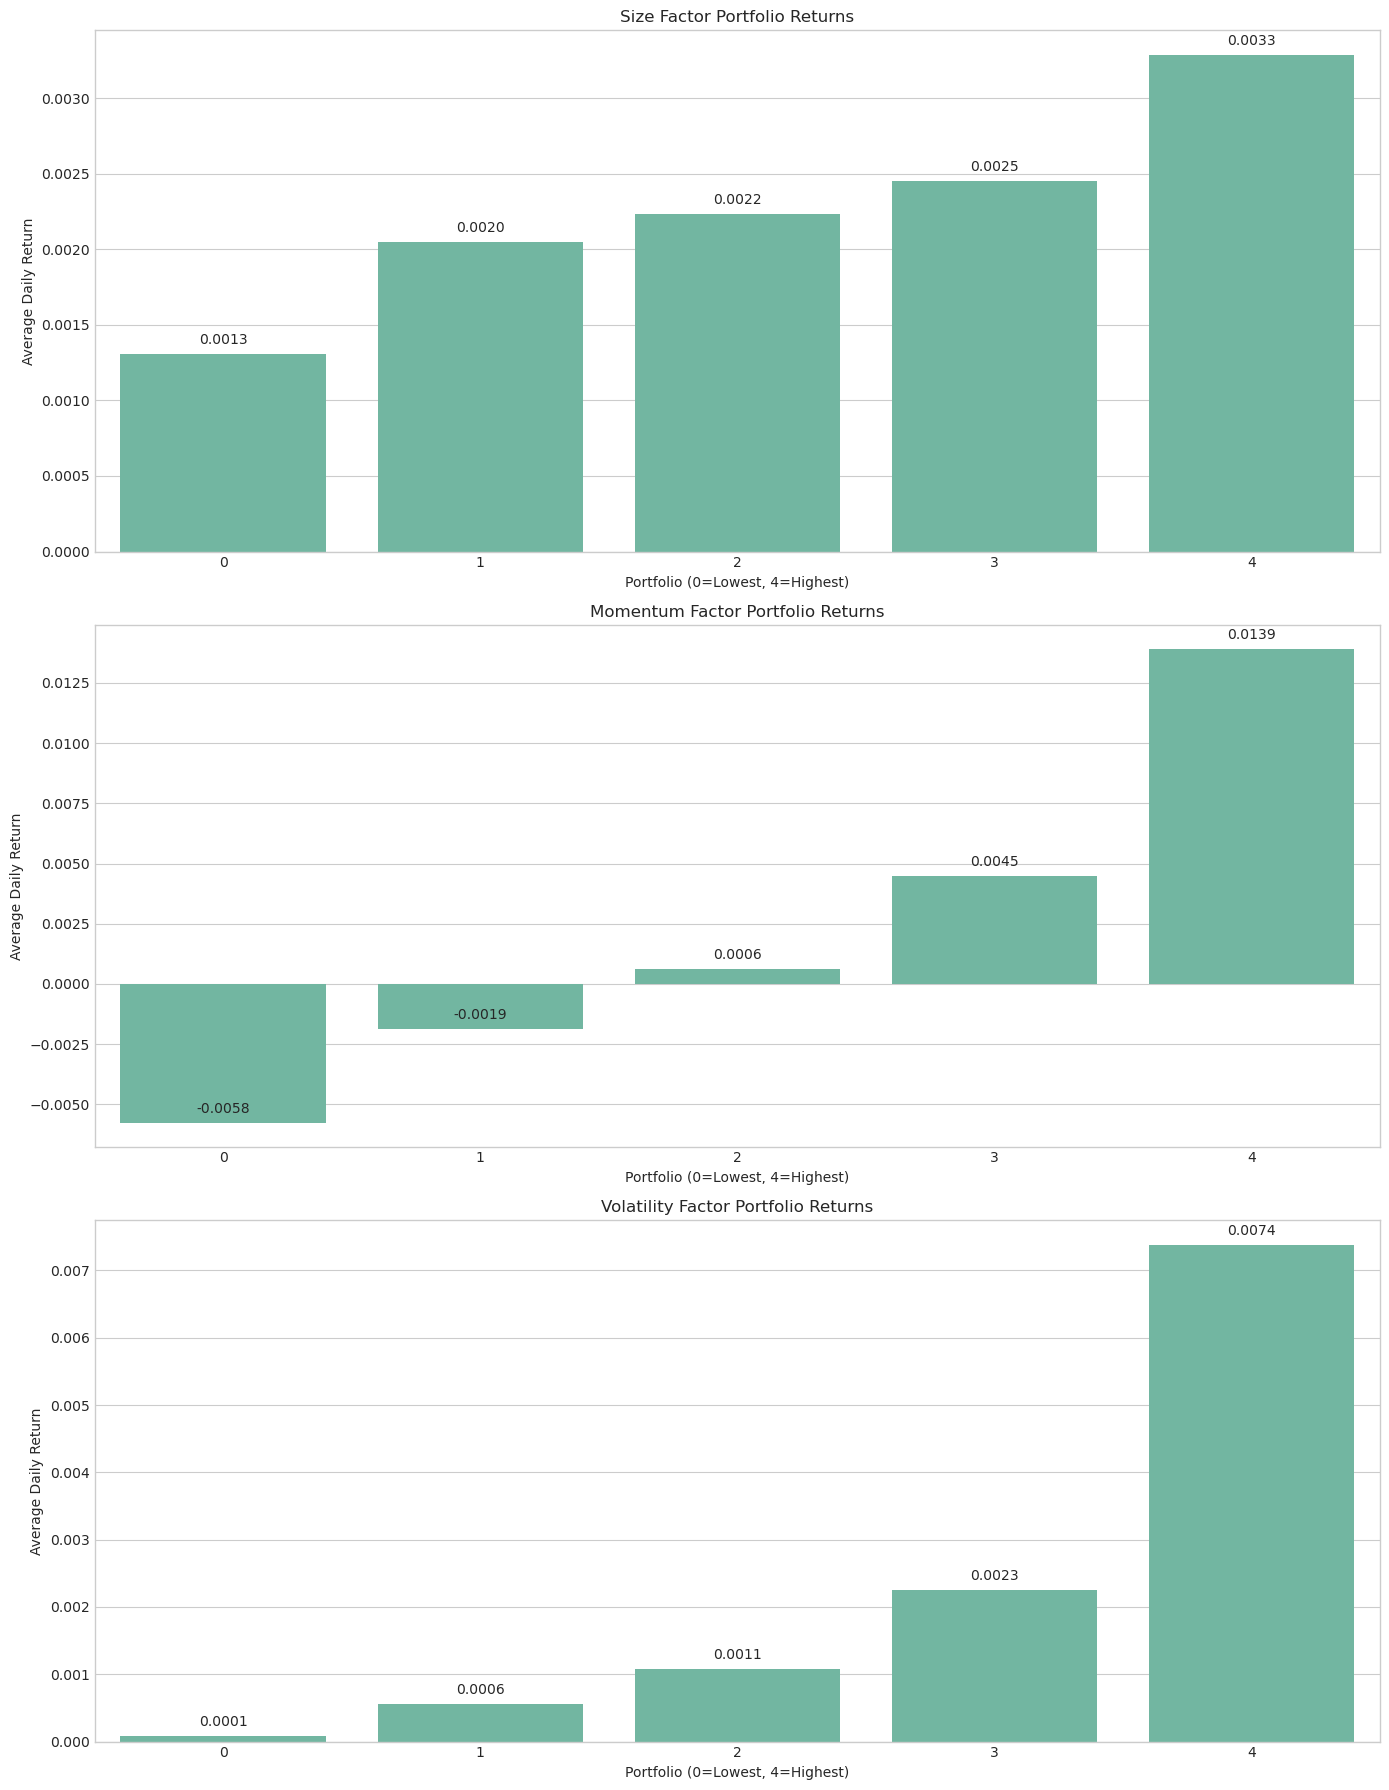

In [29]:
portfolio_stats = model.build_factor_portfolios()

Running multifactor regression...


Running regressions: 100%|██████████| 105/105 [00:00<00:00, 218.79it/s]


Analyzing regression results...


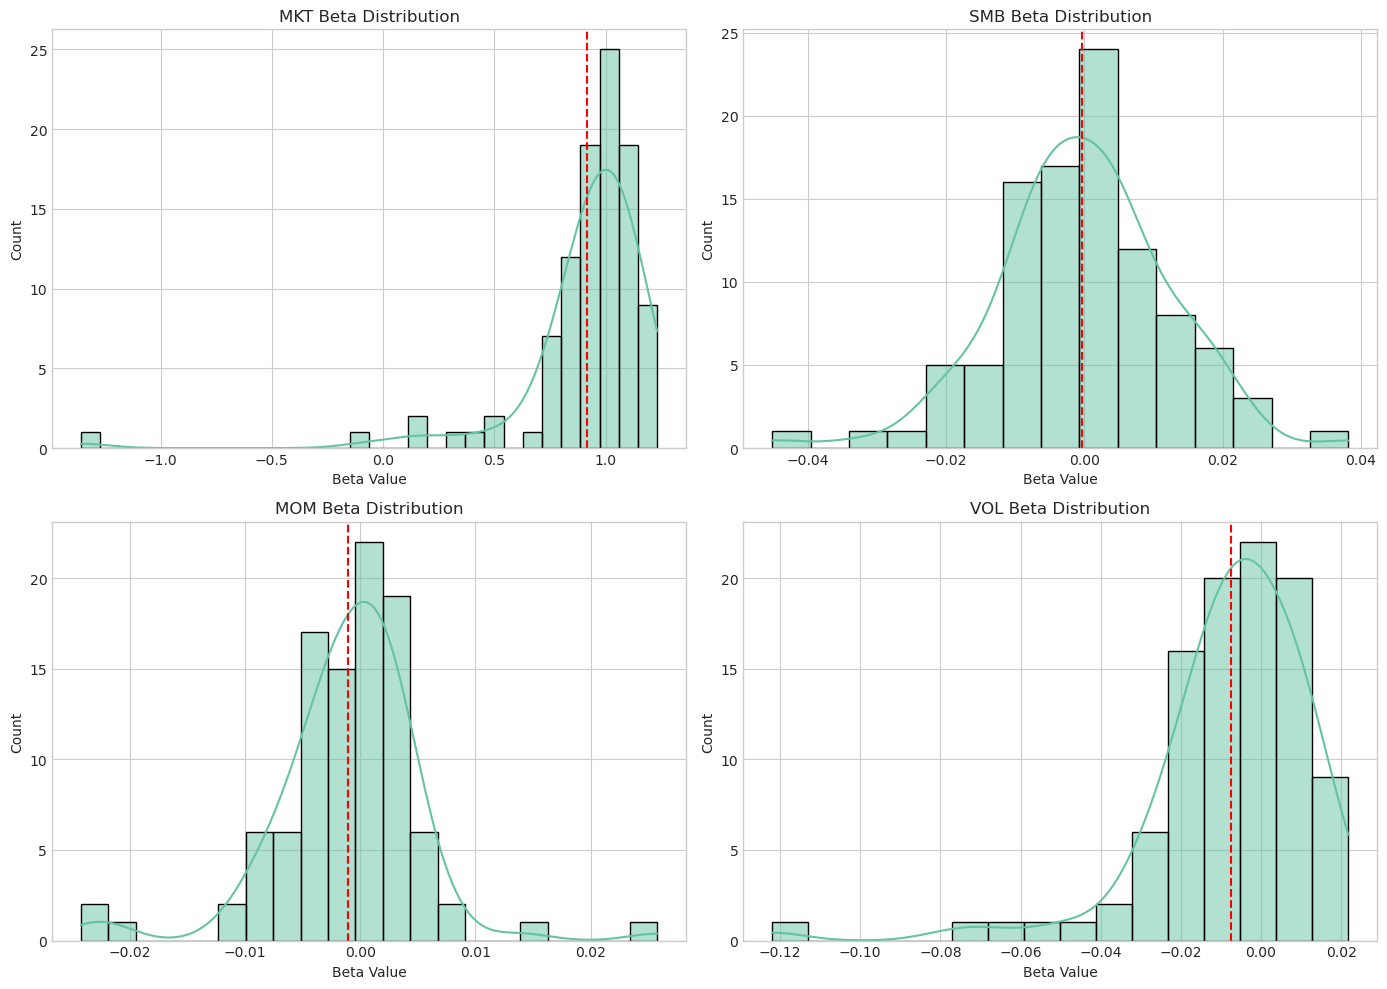

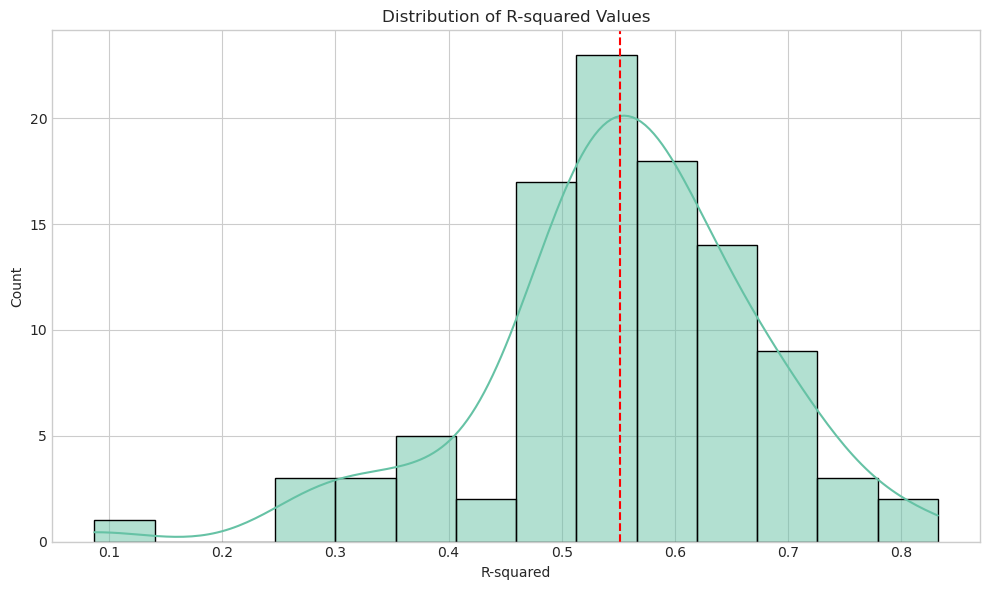

In [35]:
regression_results = model.run_multifactor_regression()

Building investment portfolio...


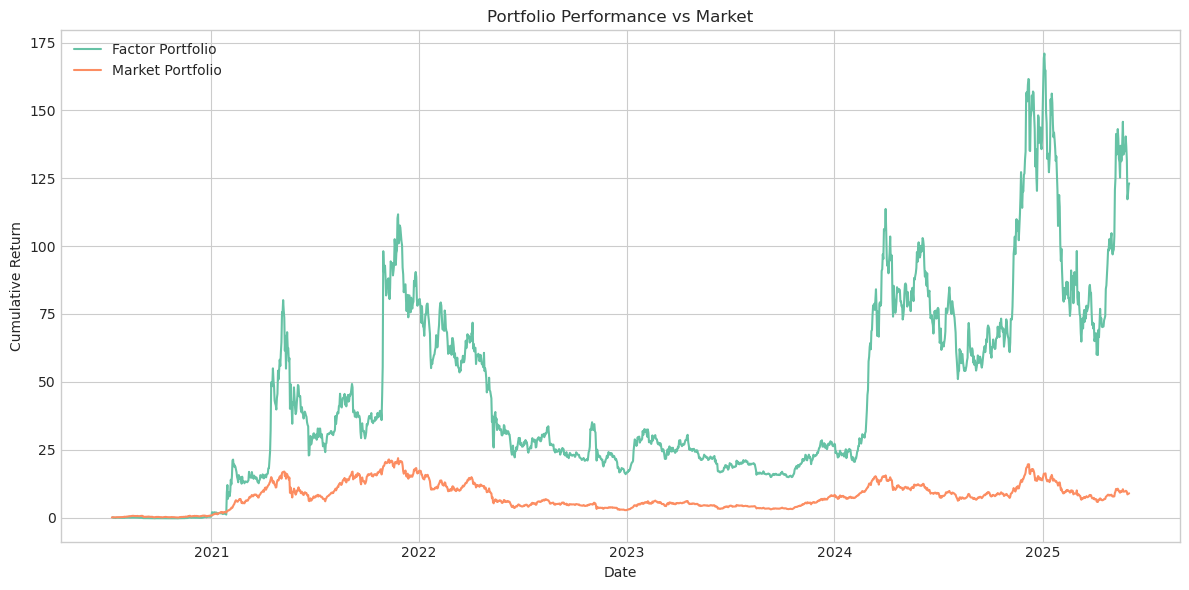

In [36]:
top_symbols, portfolio_metrics = model.build_investment_portfolio()